# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

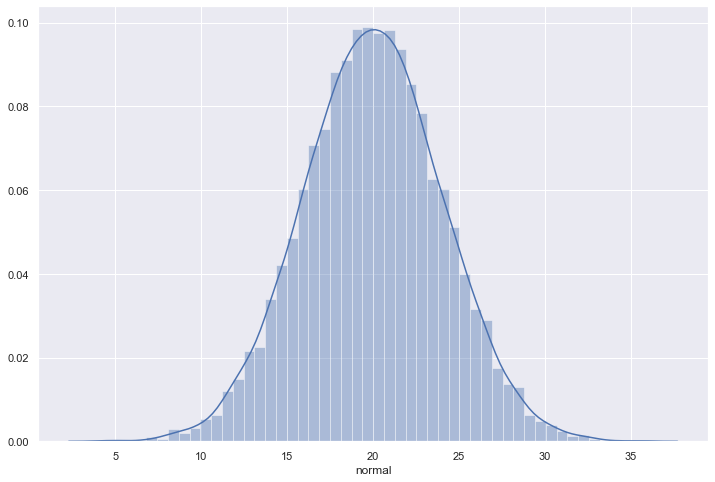

In [4]:
# Sua análise da parte 1 começa aqui.

#vamos dar uma olhada na distribuição normal

sns.distplot(dataframe.normal)


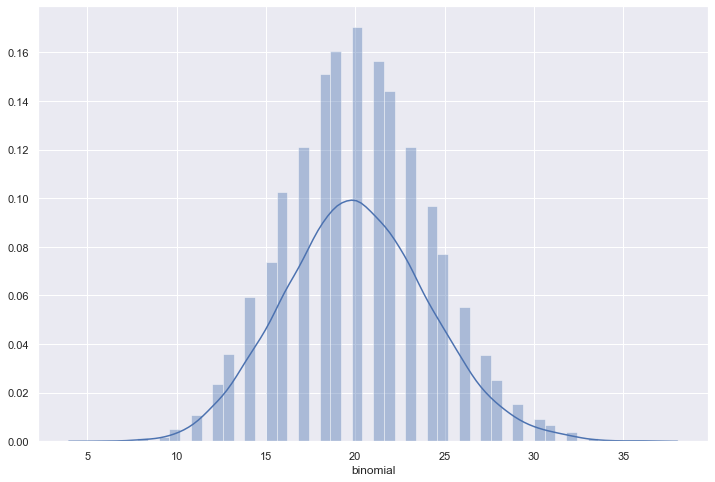

In [5]:
# mesmo com a binomial

sns.distplot(dataframe.binomial)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [6]:
# calculando os quartis solicitados para a distribuição normal
# podemos usar o método quartile() para encontrarmos os valores que acumulam as probabilidades do quartil

q1_norm = dataframe.normal.quantile(0.25)
q2_norm = dataframe.normal.quantile(0.5) # aqui devemos ver o valor médio
q3_norm = dataframe.normal.quantile(0.75)

dataframe.normal.quantile([0.25,0.5,0.75])

0.25    17.309638
0.50    19.989620
0.75    22.684324
Name: normal, dtype: float64

In [7]:
# calculando os quartis solicitados para a distribuição normal
# podemos usar o método quartile() para encontrarmos os valores que acumulam as probabilidades do quartil


q1_binom = dataframe.binomial.quantile(0.25)
q2_binom = dataframe.binomial.quantile(0.5) # aqui devemos ver o valor médio
q3_binom = dataframe.binomial.quantile(0.75)

dataframe.binomial.quantile([0.25,0.5,0.75])

0.25    17.0
0.50    20.0
0.75    23.0
Name: binomial, dtype: float64

In [8]:
(round(q1_norm - q1_binom,3), round(q2_norm - q2_binom,3), round(q3_norm - q3_binom,3))

(0.31, -0.01, -0.316)

In [9]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return (round(q1_norm - q1_binom,3), round(q2_norm - q2_binom,3), round(q3_norm - q3_binom,3))
    

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [10]:
# vamos definir a media e o desvio dos dados

df_n_mean = dataframe.normal.mean()
df_n_std = dataframe.normal.std()

# Podemos fazer o fit da distribuição com ECDF() 
norm_fit = ECDF(dataframe.normal)

#calculando o intervalo entre um desvio padrão
prob_intervalo = round(norm_fit(df_n_mean + df_n_std) - norm_fit(df_n_mean - df_n_std),3)

prob_intervalo


0.684

In [11]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return prob_intervalo

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [12]:
# calculando para a binomial
m_binom = dataframe.binomial.mean()
v_binom = dataframe.binomial.var()

# e para a normal
m_norm = dataframe.normal.mean()
v_norm =dataframe.normal.var()

In [13]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return (round(m_binom - m_norm, 3), round(v_binom - v_norm, 3))

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [14]:
stars = pd.read_csv("pulsar_stars.csv")

print(stars.head())

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

     140.5625  55.68378214  -0.234571412  -0.699648398  3.199832776  \
0  102.507812    58.882430      0.465318     -0.515088     1.677258   
1  103.015625    39.341649      0.323328      1.051164     3.121237   
2  136.750000    57.178449     -0.068415     -0.636238     3.642977   
3   88.726562    40.672225      0.600866      1.123492     1.178930   
4   93.570312    46.698114      0.531905      0.416721     1.636288   

   19.11042633  7.975531794  74.24222492  0  
0    14.860146    10.576487   127.393580  0  
1    21.744669     7.735822    63.171909  0  
2    20.959280     6.896499    53.593661  0  
3    11.468720    14.269573   252.567306  0  
4    14.545074    10.621748   131.394004  0  


## Inicie sua análise da parte 2 a partir daqui

In [15]:
# Sua análise da parte 2 começa aqui.
stars['target'].value_counts()

False    16258
True      1639
Name: target, dtype: int64

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [16]:
def round_3(value):
    return round(value, 3)


# 1. Filtrando os valores

false_pulsar_stars_mean_profile = stars[stars['target'] == 0]['mean_profile']

#2. padronizando com a função zscores
false_pulsar_stars_mean_profile_normalized = sct.zscore(false_pulsar_stars_mean_profile, ddof=0)

# encontrando os quantis teoricos
q80_norm = sct.norm.ppf(0.80, 0, 1)
q90_norm = sct.norm.ppf(0.90, 0, 1)
q95_norm = sct.norm.ppf(0.95, 0, 1)

#inspecionando
print(q80_norm, q90_norm, q95_norm )

# Novamente fazendo o fit da distribuição com ECDF() 
norm_fit_pulsar = ECDF(false_pulsar_stars_mean_profile_normalized)

# tupla arrendondando para três casas
new_probs = (round_3(norm_fit_pulsar(q80_norm)), round_3(norm_fit_pulsar(q90_norm)), round_3(norm_fit_pulsar(q95_norm)))


0.8416212335729143 1.2815515655446004 1.6448536269514722


In [17]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return new_probs
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [18]:
# quantis teoricos
q25_n = sct.norm.ppf(0.25, 0, 1)
q50_n = sct.norm.ppf(0.5, 0, 1)
q75_n = sct.norm.ppf(0.75, 0, 1)

# quantis da distribuição
q25_ecdf = np.quantile(false_pulsar_stars_mean_profile_normalized, .25)
q50_ecdf = np.quantile(false_pulsar_stars_mean_profile_normalized, .5)
q75_ecdf = np.quantile(false_pulsar_stars_mean_profile_normalized, .75)

#inspecionando
diff = (round_3(q25_ecdf-q25_n), round_3(q50_ecdf-q50_n), round_3(q75_ecdf-q75_n))
diff

(0.027, 0.04, -0.004)

In [19]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return diff

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.